In [4]:
import numpy as np
from afqmc import *
import matplotlib.pyplot as plt

In [5]:
U = 4
mu = U / 2
L = 20
N = 10
dimension = 2
size = N**dimension
# s = -np.ones((L, size))
# sはL×Nの行列で、要素は1か-1
s = np.random.choice([-1, 1], size=(L, size))
p = {
    "N": N,
    "L": L,
    "beta": 3,
    "t": 1.0,
    "U": U,
    "mu": mu,
    "s": s,
    "dimension": dimension,
    "rank": 1,
}

afqmc = AFQMC(**p)

In [6]:
Szz_beta_rank = [np.load("./data/Szz_" + str(rank) + ".npy") for rank in range(12)]
Szz_beta = np.load("./data/Szz.npy")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


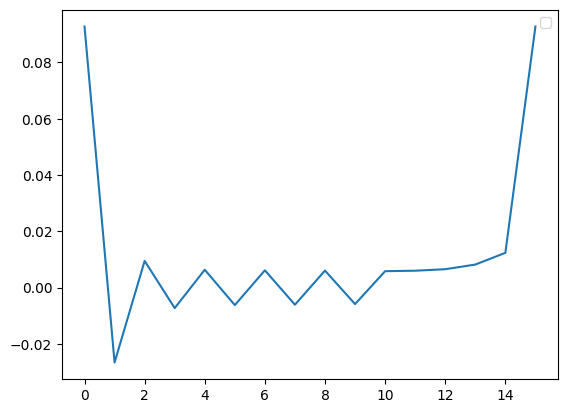

In [7]:
Szz_on_path = (
    [Szz_beta[5][x, 0] for x in range(6)]
    + [Szz_beta[5][5, y] for y in range(1, 6)]
    + [Szz_beta[5][xy, xy] for xy in reversed(range(5))]
)
fig, ax = plt.subplots()
ax.plot(Szz_on_path)
ax.legend()

In [8]:
Szz_pipi_beta = [afqmc.make_S_pipi(Szz) for Szz in Szz_beta]
Szz_pipi_beta_rank = [
    [afqmc.make_S_pipi(Szz) for Szz in Szz_beta] for Szz_beta in Szz_beta_rank
]

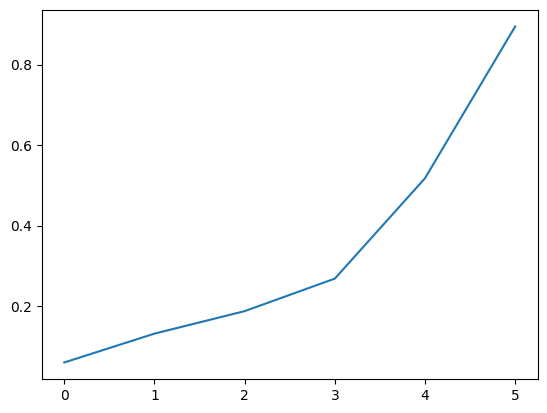

In [9]:
fig, ax = plt.subplots()
ax.plot(range(6), Szz_pipi_beta)